## GenderDetection

In [13]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
DIRECTORY = r"C:\Users\azwin\OneDrive\Desktop\GenderDetc"
CATEGORIES = ['man', 'woman']

## Data Preprocessing

In [15]:
from sklearn.model_selection import train_test_split


IMG_SIZE = 90
data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category) 
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        if img.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff', 'gif')):
            img_arr = cv2.imread(img_path)
            if img_arr is not None:
                img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                data.append([img_arr, label])
            else:
                print(f"Error loading image: {img_path}")
        else:
            print(f"Skipping non-image file: {img_path}")



Skipping non-image file: C:\Users\azwin\OneDrive\Desktop\GenderDetc\man\.DS_Store
Skipping non-image file: C:\Users\azwin\OneDrive\Desktop\GenderDetc\woman\.DS_Store


In [16]:
random.shuffle(data)
X = np.array([item[0] for item in data], dtype='float32') / 255.0  
y = np.array([item[1] for item in data], dtype='int32')

## Train/Test/split

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<Axes: >

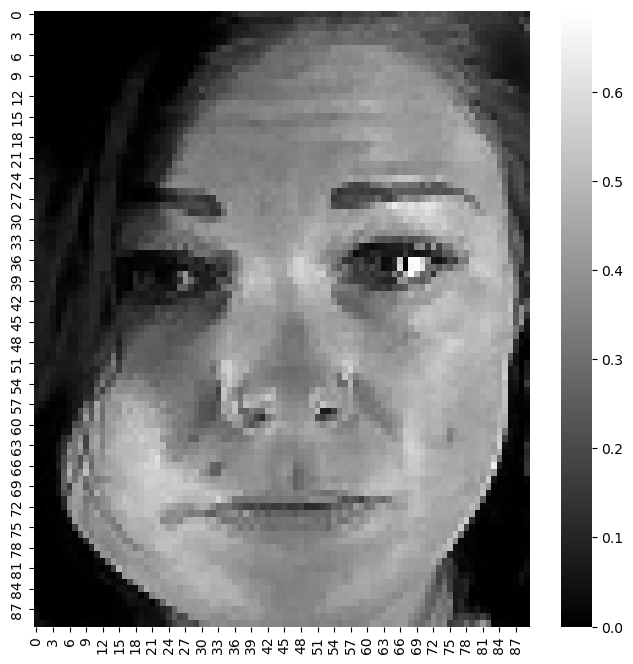

In [18]:
grayscale_image = rgb2gray(X_train[0])  
plt.figure(figsize=(8, 8))
sns.heatmap(grayscale_image, cmap='gray', annot=False)

<Axes: >

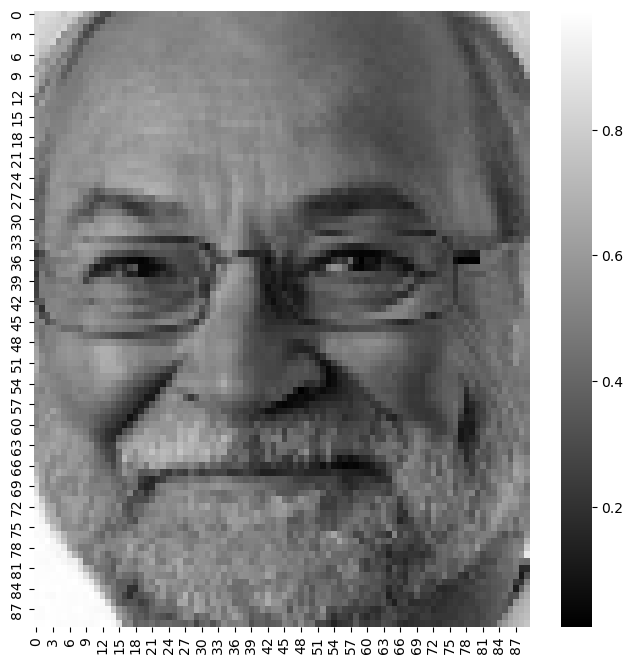

In [19]:
grayscale_image = rgb2gray(X_train[100])  
plt.figure(figsize=(8, 8))
sns.heatmap(grayscale_image, cmap='gray', annot=False)

In [20]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

In [21]:
print(f"Training data: {len(X_train)} samples")
print(f"Validation data: {len(X_val)} samples")
print(f"Test data: {len(X_test)} samples")

Training data: 1614 samples
Validation data: 346 samples
Test data: 347 samples


## Model Training

In [23]:
input_shape = (IMG_SIZE, IMG_SIZE, 3)
model = Sequential([
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
    
])

C:\Users\azwin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Compiling and Fitting

In [24]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [26]:
history = model.fit(
    X_train, y_train,  
    epochs=100,  
    batch_size=40,  
    validation_data=(X_val, y_val)  
)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - accuracy: 0.8947 - loss: 0.2773 - val_accuracy: 0.8613 - val_loss: 0.3685
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.8962 - loss: 0.2552 - val_accuracy: 0.8410 - val_loss: 0.3882
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.8931 - loss: 0.2700 - val_accuracy: 0.8728 - val_loss: 0.3396
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.9088 - loss: 0.2258 - val_accuracy: 0.8382 - val_loss: 0.4055
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.8934 - loss: 0.2699 - val_accuracy: 0.8671 - val_loss: 0.3533
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.9300 - loss: 0.2079 - val_accuracy: 0.8439 - val_loss: 0.3782
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.9032 - loss: 0.2350 - val_accuracy: 0.8468 - val_loss: 0.3546
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - accuracy: 0.9119 - loss: 0.2343 - val_accu

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 90, 90, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,623,621 (13.82 MB)

 Trainable params: 1,207,873 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,415,748 (9.22 MB)

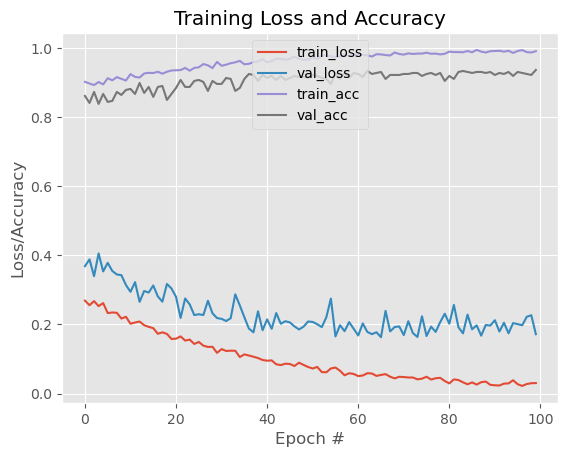

In [29]:
import matplotlib.pyplot as plt
import numpy as np


epochs = 100  

# Plotting
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model.history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model.history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), model.history.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper center")
plt.show()

## Model Prediction



11/11 - 0s - 34ms/step - accuracy: 0.9251 - loss: 0.2501
Test Loss: 0.25013619661331177
Test Accuracy: 0.9250720739364624
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Classification Report:
              precision    recall  f1-score   support

         man       0.96      0.89      0.92       174
       woman       0.89      0.97      0.93       173

    accuracy                           0.93       347
   macro avg       0.93      0.93      0.92       347
weighted avg       0.93      0.93      0.92       347

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


C:\Users\azwin\AppData\Local\Temp\ipykernel_2176\3731864908.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = CATEGORIES[int(prediction > 0.5)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


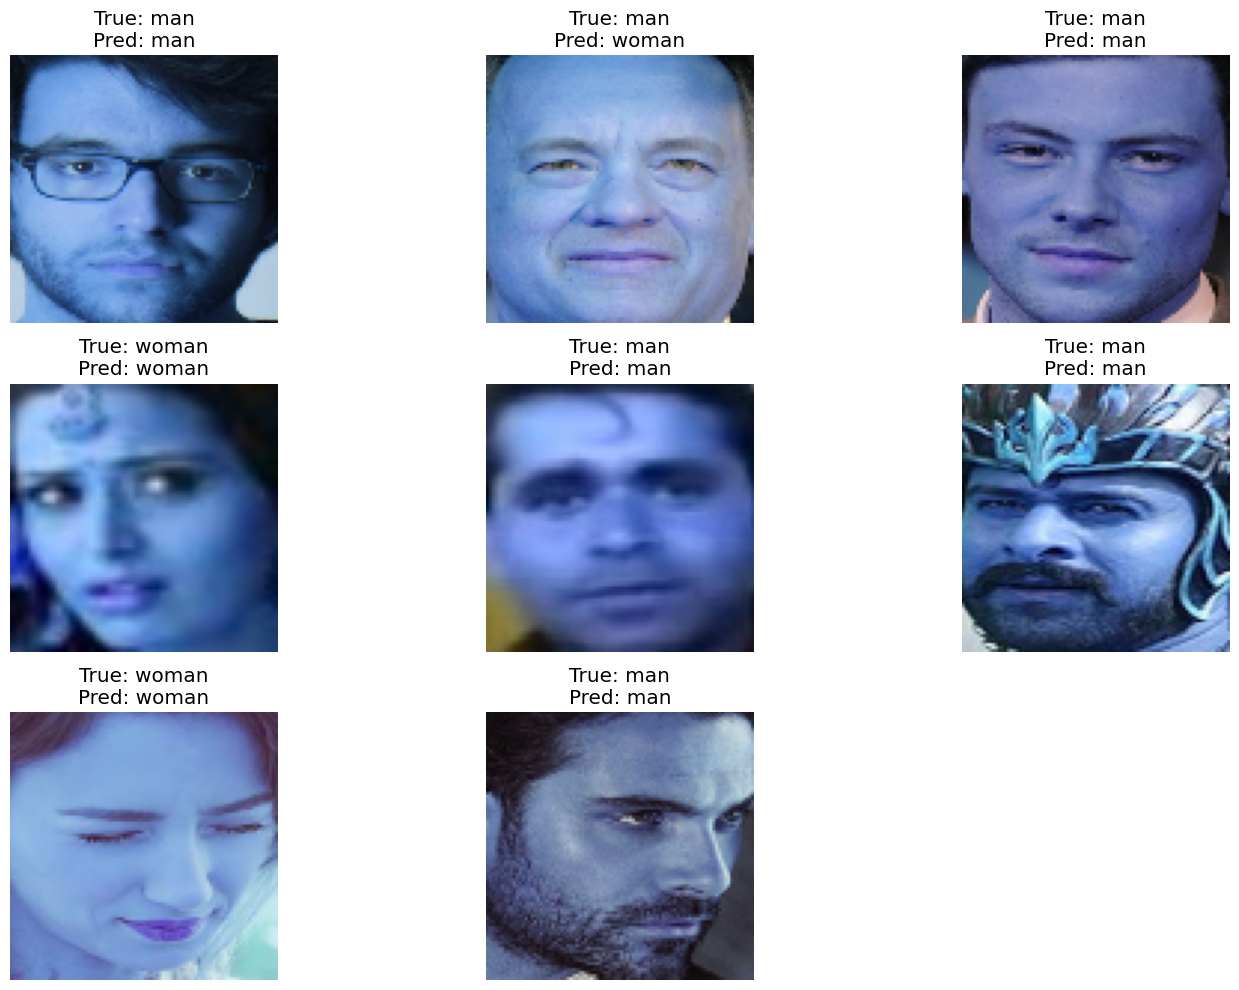

In [32]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


predictions = (model.predict(X_test) > 0.5).astype("int32")  
print("Classification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=CATEGORIES))


def display_predictions(images, labels, start, end):
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(range(11, 19), 1):  
        test_image = images[idx]
        img = np.expand_dims(test_image, axis=0) 
        prediction = model.predict(img)  
        predicted_label = CATEGORIES[int(prediction > 0.5)]  
        true_label = CATEGORIES[labels[idx]]  

        
        plt.subplot(3, 3, i)  
        plt.imshow(test_image)
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


display_predictions(X_test, y_test, start=1, end=10)



## Real World Image Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The predicted gender is: woman


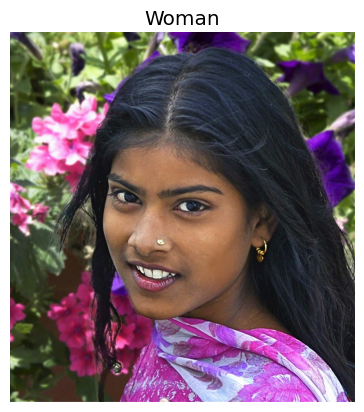

In [54]:
def predict_gender(image_path, model):
    # Load the image and preprocess it
    img = cv2.imread(image_path)
    img = cv2.resize(img, (90, 90))  # Ensure the size matches what your model expects
    img = img / 255.0  # Normalize the image (if your model expects normalized data)
    img = img.reshape(1, 90, 90, 3)  # Reshape to include batch dimension

    # Predict using the model
    prediction = model.predict(img)
    return 'woman' if prediction[0][0] > 0.5 else 'man'

# Predict gender for the given image
image_path = r"C:\Users\azwin\OneDrive\Desktop\pic for pred.jpg"
predicted_gender = predict_gender(image_path, model)
print(f"The predicted gender is: {predicted_gender}")

img = cv2.imread(r"C:\Users\azwin\OneDrive\Desktop\pic for pred.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Woman")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The predicted gender is: man


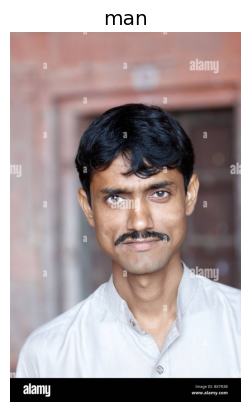

In [52]:
def predict_gender(image_path, model):
    # Load the image and preprocess it
    img = cv2.imread(image_path)
    img = cv2.resize(img, (90, 90))  # Ensure the size matches what your model expects
    img = img / 255.0  # Normalize the image (if your model expects normalized data)
    img = img.reshape(1, 90, 90, 3)  # Reshape to include batch dimension

    # Predict using the model
    prediction = model.predict(img)
    return 'woman' if prediction[0][0] > 0.5 else 'man'

# Predict gender for the given image
image_path = r"C:\Users\azwin\OneDrive\Desktop\pic2 for pred.jpg"
predicted_gender = predict_gender(image_path, model)
print(f"The predicted gender is: {predicted_gender}")

img = cv2.imread(r"C:\Users\azwin\OneDrive\Desktop\pic2 for pred.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("man")
plt.axis('off')
plt.show()

## Conclusion

> The project demonstrates a successful implementation of a gender detection model using CNNs. The accuracy achieved and the observations from the classification report indicate the model's effectiveness in classifying gender based on facial features. The use of data augmentation and dropout layers contributes to model generalization and robustness.

> Learning rate, batch size, and the number of layers lead to further improvements in accuracy and generalization.

> Model predicted Real world image correctly, proving the training efficiency and shows the power of CNNs for image classification.